In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [3]:
df_region = pd.read_excel(r"E:\DATA\LEAP输入数据（京津冀、南方5省）\Province & Sector_Eng.xlsx")
region_grid = df_region.set_index('Province')['Region_grid'].to_dict()

### 原煤供应量

In [5]:
df_coal = pd.read_excel(r"E:\Test\Inputs\CFPP.xlsx")
df = df_coal.groupby(['Province', 'Statistical month'])[['Monthly_Coal_Ele_tce', 'Monthly_Coal_Heat_tce']].sum().div(1000).reset_index() # million tce

In [6]:
df['ALL'] = df['Monthly_Coal_Ele_tce'] + df['Monthly_Coal_Heat_tce']
coal_all = df['ALL'].sum()/0.7143
coal_all

2121090.748450639

In [104]:
df['ALL'] = df['Monthly_Coal_Ele_tce'] + df['Monthly_Coal_Heat_tce']

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}


df['Month'] = df['Statistical month'].apply(lambda x: month_map[int(str(x)[4:])])
df['region'] = df['Province'].map(region_grid)


# 确保按照指定的顺序排序
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = df.reset_index()
df['Month'] = pd.Categorical(df['Month'], categories=order, ordered=True)

region_order = ['South grid', 'East grid','Central grid', 'North grid','Northeast grid','Northwest grid'] 
df['region'] = pd.Categorical(df['region'], categories=region_order, ordered=True)

# 按 'region' 和 'Month' 排序
df = df.sort_values(['region', 'Month'])

# pivot 表格，使其适合堆积图
pivot_df = df.pivot_table(index='Month', columns='region', values='Monthly_Coal_Ele_tce', aggfunc='sum')
pivot_df_all = df.pivot_table(index='Month', columns='region', values='ALL', aggfunc='sum')

In [115]:
df_ratio = df.groupby('Month')['Monthly_Coal_Ele_tce'].sum()
df_ratio_2 = df.groupby('Month')['Monthly_Coal_Heat_tce'].sum()

# 求全年总和
total_year = df_ratio.sum()
total_year_2 = df_ratio_2.sum()
# # 计算每个月占全年的比例

total_year_2/total_year

0.15492317373176312

In [118]:
df_ratio

Month
Jan    1137.689099
Feb     925.300788
Mar    1057.393948
Apr    1017.424591
May    1037.209049
Jun    1085.635078
Jul    1201.985278
Aug    1208.001930
Sep    1078.201877
Oct    1059.430095
Nov    1087.734675
Dec    1222.572873
Name: Monthly_Coal_Ele_tce, dtype: float64

In [119]:
df_ratio_2

Month
Jan    293.841692
Feb    293.841692
Mar    226.524387
Apr    120.858273
May    101.294769
Jun     86.223075
Jul     86.223075
Aug     86.223075
Sep     92.817838
Oct    119.451475
Nov    231.230894
Dec    293.841692
Name: Monthly_Coal_Heat_tce, dtype: float64

## 堆积图-分区域

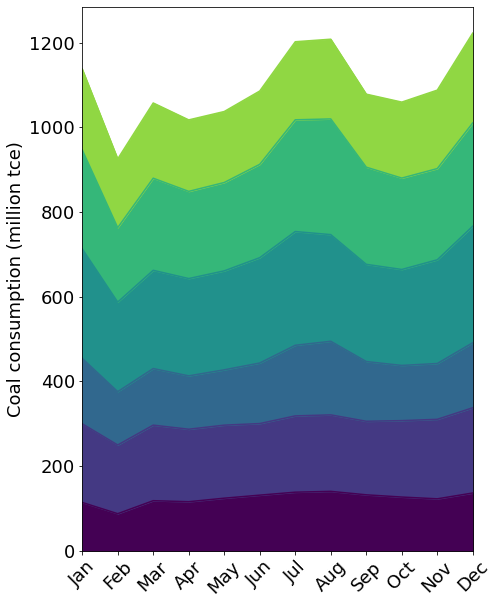

In [105]:
fig, ax = plt.subplots(figsize=(7, 10))


# 绘制面积堆积图
pivot_df.plot(kind='area', stacked=True, color=colors, ax=ax)

ax.margins(x=0)

months = pivot_df.index  #
ax.set_xticks(ticks=range(len(months)), labels=months, rotation=45, fontsize=18)
ax.set_ylabel('Coal consumption (million tce)', fontsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('')
ax.legend().remove()

plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/Background/coal_supply_ele.png", dpi=300, bbox_inches='tight')

plt.show()


In [23]:
df_heat_supply = pd.read_csv(r"E:\Test\Inputs\heat_amount_monthly_province.csv")
df_heat_supply['region'] = df_heat_supply['Province'].map(region_grid)
df_heat_supply = df_heat_supply.drop(columns=['Total'])

df_hs = df_heat_supply.groupby(['region']).sum().div(100).reset_index() #将万→百万
df_hs = df_hs[df_hs['region']!=0]

custom_order = ['South grid', 'East grid','Central grid', 'North grid','Northeast grid','Northwest grid' ]
df_hs['region'] = pd.Categorical(df_hs['region'], categories=custom_order, ordered=True)
df_hs = df_hs.sort_values('region').reset_index(drop=True)
df_hs

,region,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,South grid,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260,4.991260
1,East grid,214.210505,214.210505,214.210505,127.307231,73.252065,35.912782,35.912782,35.912782,52.250941,107.681005,214.210505,214.210505
2,Central grid,53.453991,53.453991,32.714505,12.002241,12.002241,12.002241,12.002241,12.002241,12.002241,12.002241,32.714505,53.453991
3,North grid,341.942832,341.942832,198.734544,56.251142,56.251142,56.251142,56.251142,56.251142,56.251142,56.251142,198.734544,341.942832
4,Northeast grid,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573,115.791573
5,Northwest grid,74.983373,74.983373,54.907746,11.383362,2.987132,2.987132,2.987132,2.987132,2.987132,23.101552,66.625936,74.983373


### 能源供给量

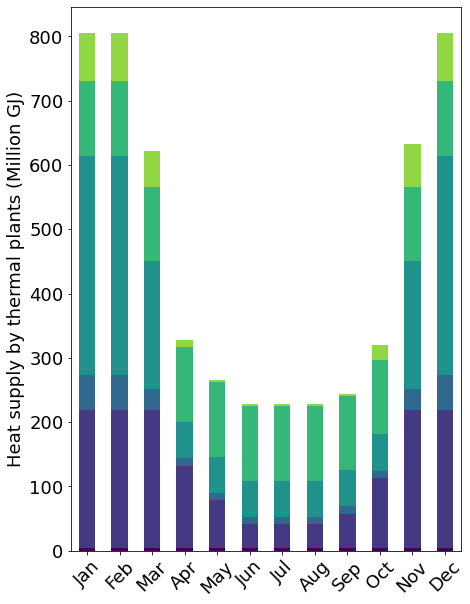

In [68]:
num_regions = len(df_hs.index)
colors = [cm.viridis(i / num_regions) for i in range(num_regions)]

# df_hs.set_index('region', inplace=True)
fig, ax = plt.subplots(figsize=(7, 10))

df_hs.T.plot(kind='bar', stacked=True,color=colors, ax=ax)

ax.margins(x=0)
months = df_hs.columns  # 假设df_hs的列是月份
ax.set_xticks(ticks=range(len(months)), labels=months, rotation=45, fontsize=18)
ax.set_ylabel('Heat supply by thermal plants (Million GJ)', fontsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.legend().remove()

plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/Background/heat_supply.png", dpi=300, bbox_inches='tight')
plt.show()



In [46]:
df_elc_supply = pd.read_csv(r"E:\Test\Inputs\load_amount_monthly_province.csv")
df_elc_supply['region'] = df_elc_supply['Province'].map(region_grid)

df_es = df_elc_supply.groupby(['region']).sum().div(278/100).reset_index() # Unit: 1e8 kWh → 1e6 GJ
df_es = df_es[df_es['region']!=0]

df_es['region'] = pd.Categorical(df_es['region'], categories=custom_order, ordered=True)
df_es = df_es.sort_values('region').reset_index(drop=True)
df_es

,region,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,South grid,175.200765,132.968967,183.157524,180.752344,194.047642,206.254013,218.835638,221.179369,207.568638,198.521331,189.913363,208.506880
1,East grid,242.994617,211.544230,232.477825,222.769209,224.382926,219.528343,234.337863,234.322520,225.046159,234.539197,245.022379,263.322501
2,Central grid,218.580666,177.975714,189.071898,178.699889,184.882177,202.179776,234.956773,246.759347,201.201343,185.426185,187.500704,217.945382
3,North grid,369.882908,301.792395,328.866249,323.598071,330.007033,352.500492,382.638428,358.147206,325.635160,320.216397,348.382212,392.865825
4,Northeast grid,362.049276,271.908999,337.393127,318.910319,322.945123,340.996109,408.350218,423.307415,355.406583,334.018184,333.519849,377.885448
5,Northwest grid,244.867811,207.742838,227.407242,216.264576,214.701877,221.761585,235.590939,240.670946,221.079599,229.710939,237.462575,270.364974


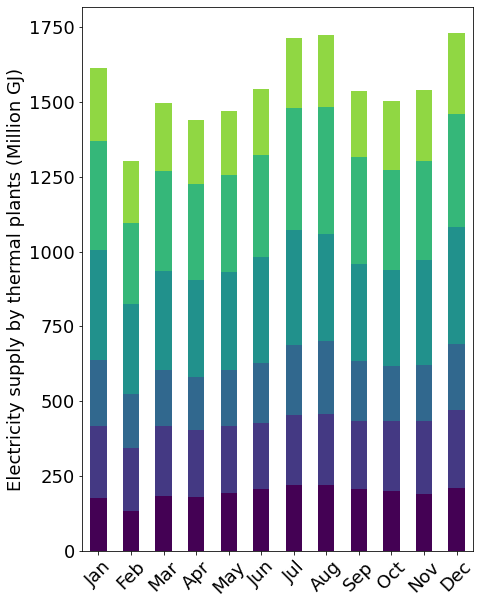

In [66]:
# df_es.set_index('region', inplace=True)
fig, ax = plt.subplots(figsize=(7, 10))

df_es.T.plot(kind='bar', stacked=True,color=colors, ax=ax)

ax.margins(x=0)
months = df_es.columns  # 假设df_hs的列是月份
ax.set_xticks(ticks=range(len(months)), labels=months, rotation=45, fontsize=18)
ax.set_ylabel('Electricity supply by thermal plants (Million GJ)', fontsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.legend().remove()

plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/Background/ele_supply.png", dpi=300, bbox_inches='tight')
plt.show()


In [50]:
# 创建一个新的 DataFrame，保留 region 列
df_combined = df_es.copy()
df_combined.loc[:, 'Jan':'Dec'] = df_es.loc[:, 'Jan':'Dec'] + df_hs.loc[:, 'Jan':'Dec']

df_combined

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
region,,,,,,,,,,,,
South grid,180.192025,137.960227,188.148784,185.743605,199.038902,211.245274,223.826898,226.170629,212.559898,203.512592,194.904624,213.498140
East grid,457.205122,425.754735,446.688330,350.076440,297.634990,255.441126,270.250645,270.235302,277.297100,342.220202,459.232884,477.533006
Central grid,272.034657,231.429705,221.786403,190.702130,196.884418,214.182017,246.959014,258.761587,213.203584,197.428425,220.215209,271.399373
North grid,711.825740,643.735227,527.600794,379.849213,386.258175,408.751633,438.889570,414.398348,381.886301,376.467538,547.116757,734.808657
Northeast grid,477.840850,387.700572,453.184701,434.701892,438.736696,456.787682,524.141792,539.098989,471.198156,449.809757,449.311422,493.677022
Northwest grid,319.851184,282.726211,282.314988,227.647938,217.689008,224.748717,238.578071,243.658078,224.066731,252.812491,304.088511,345.348347


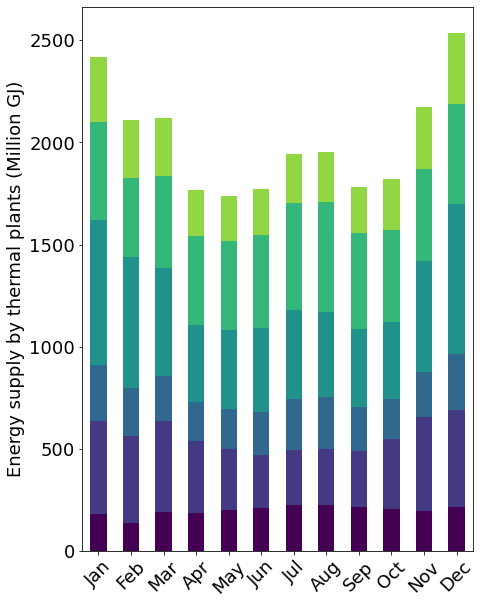

In [65]:
fig, ax = plt.subplots(figsize=(7, 10))

df_combined.T.plot(kind='bar', stacked=True,color=colors, ax=ax)

ax.margins(x=0)
months = df_combined.columns  # 假设df_hs的列是月份
ax.set_xticks(ticks=range(len(months)), labels=months, rotation=45, fontsize=18)
ax.set_ylabel('Energy supply by thermal plants (Million GJ)', fontsize=18)
ax.tick_params(axis='y', labelsize=18)


ax.legend().remove()

plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/Background/energy_supply.png", dpi=300, bbox_inches='tight')
plt.show()

### 温室气体排放量

In [72]:
custom_order = ['South grid', 'East grid','Central grid', 'North grid','Northeast grid','Northwest grid' ]
GHG_emission = [0.000784,0.000948,0.000774,0.00125,0.00134,0.000963] # tCO2eq/kWh
GHG_emission_multiplied = [value * 278 for value in GHG_emission] # tCO2eq/kWh → tCO2eq/GJ

emission_dict = dict(zip(custom_order, GHG_emission_multiplied))

for region in custom_order:
    df_es.loc[region] = df_es.loc[region] * emission_dict[region]
    df_combined.loc[region] = df_combined.loc[region] * emission_dict[region]

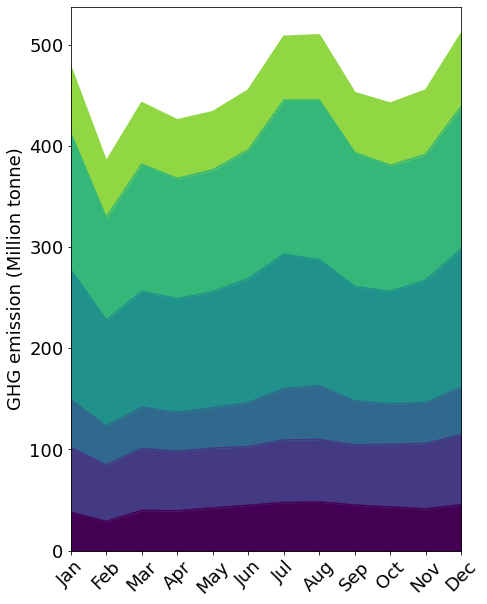

In [76]:
# df_es.set_index('region', inplace=True)
fig, ax = plt.subplots(figsize=(7, 10))

df_es.T.plot(kind='area', stacked=True,color=colors, ax=ax)

ax.margins(x=0)
months = df_es.columns  # 假设df_hs的列是月份
ax.set_xticks(ticks=range(len(months)), labels=months, rotation=45, fontsize=18)
ax.set_ylabel('GHG emission (Million tonne)', fontsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.legend().remove()

plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/Background/ele_supply_emission.png", dpi=300, bbox_inches='tight')
plt.show()


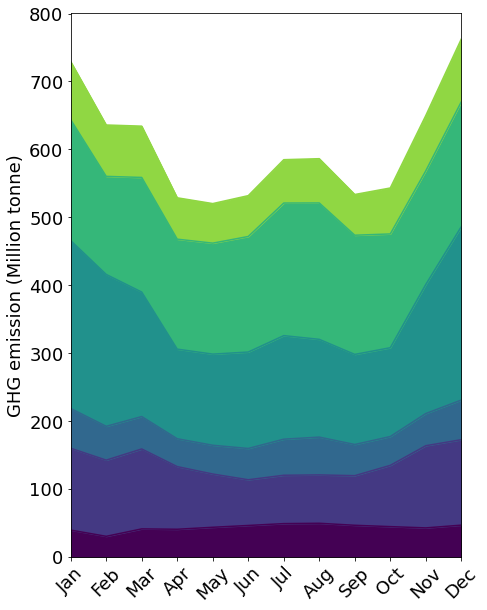

In [77]:
fig, ax = plt.subplots(figsize=(7, 10))

df_combined.T.plot(kind='area', stacked=True,color=colors, ax=ax)

ax.margins(x=0)
months = df_combined.columns  # 假设df_hs的列是月份
ax.set_xticks(ticks=range(len(months)), labels=months, rotation=45, fontsize=18)
ax.set_ylabel('GHG emission (Million tonne)', fontsize=18)
ax.tick_params(axis='y', labelsize=18)


ax.legend().remove()

plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/Background/energy_supply_emission.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
df_heat_supply = pd.read_csv(r"E:\Test\Inputs\heat_amount_monthly_province.csv")
df_elc_supply = pd.read_csv(r"E:\Test\Inputs\load_amount_monthly_province.csv")

df_heat_supply.loc[:, 'Jan':'Dec'] = df_heat_supply.loc[:, 'Jan':'Dec'].div(100) #万GJ→百万GJ
df_elc_supply.loc[:, 'Jan':'Dec'] = df_elc_supply.loc[:, 'Jan':'Dec'].div(278/100) # 1e8 kWh → 1e6 GJ

custom_order = ['Northwest grid','East grid','North grid','Central grid','Northeast grid', 'South grid' ]
df_elc_supply = df_elc_supply[df_elc_supply['Province'] != 'Tibet']
df_elc_supply['region'] = df_elc_supply['Province'].map(region_grid)

df_heat_supply = df_heat_supply[df_heat_supply['Province'] != 'Tibet']
df_heat_supply['region'] = df_heat_supply['Province'].map(region_grid)


df_heat_supply.set_index('Province', inplace=True)
df_elc_supply.set_index('Province', inplace=True)

df_elc_supply['region'] = pd.Categorical(df_elc_supply['region'], categories=custom_order, ordered=True)
df_heat_supply['region'] = pd.Categorical(df_heat_supply['region'], categories=custom_order, ordered=True)
df_elc_supply = df_elc_supply.sort_values(['region', 'Province'])
df_elc_supply.drop(columns='region',inplace=True)
df_heat_supply = df_heat_supply.sort_values(['region', 'Province'])
df_heat_supply.drop(columns='region',inplace=True)


df_total_supply = df_heat_supply.loc[:, 'Jan':'Dec'] + df_elc_supply.loc[:, 'Jan':'Dec']

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df = df_elc_supply.copy()
df['Max_Value'] = df[months].max(axis=1)
df['Min_Value'] = df[months].min(axis=1)
df['Max_Month'] = df[months].idxmax(axis=1)
df['Min_Month'] = df[months].idxmin(axis=1)
df['Ratio'] = df['Max_Value'] / df['Min_Value']
df.drop(columns=months,inplace=True)

df['Max_Value_total'] = df_total_supply[months].max(axis=1)
df['Min_Value_total'] = df_total_supply[months].min(axis=1)
df['Max_Month_total'] = df_total_supply[months].idxmax(axis=1)
df['Min_Month_total'] = df_total_supply[months].idxmin(axis=1)
df['Ratio_total'] = df['Max_Value_total'] / df['Min_Value_total']

df_combined = pd.DataFrame({
    'Province': df_elc_supply.index,
    'Elc_Ratio': df['Ratio'],
    'Total_Ratio': df['Ratio_total']
}).reset_index(drop=True)

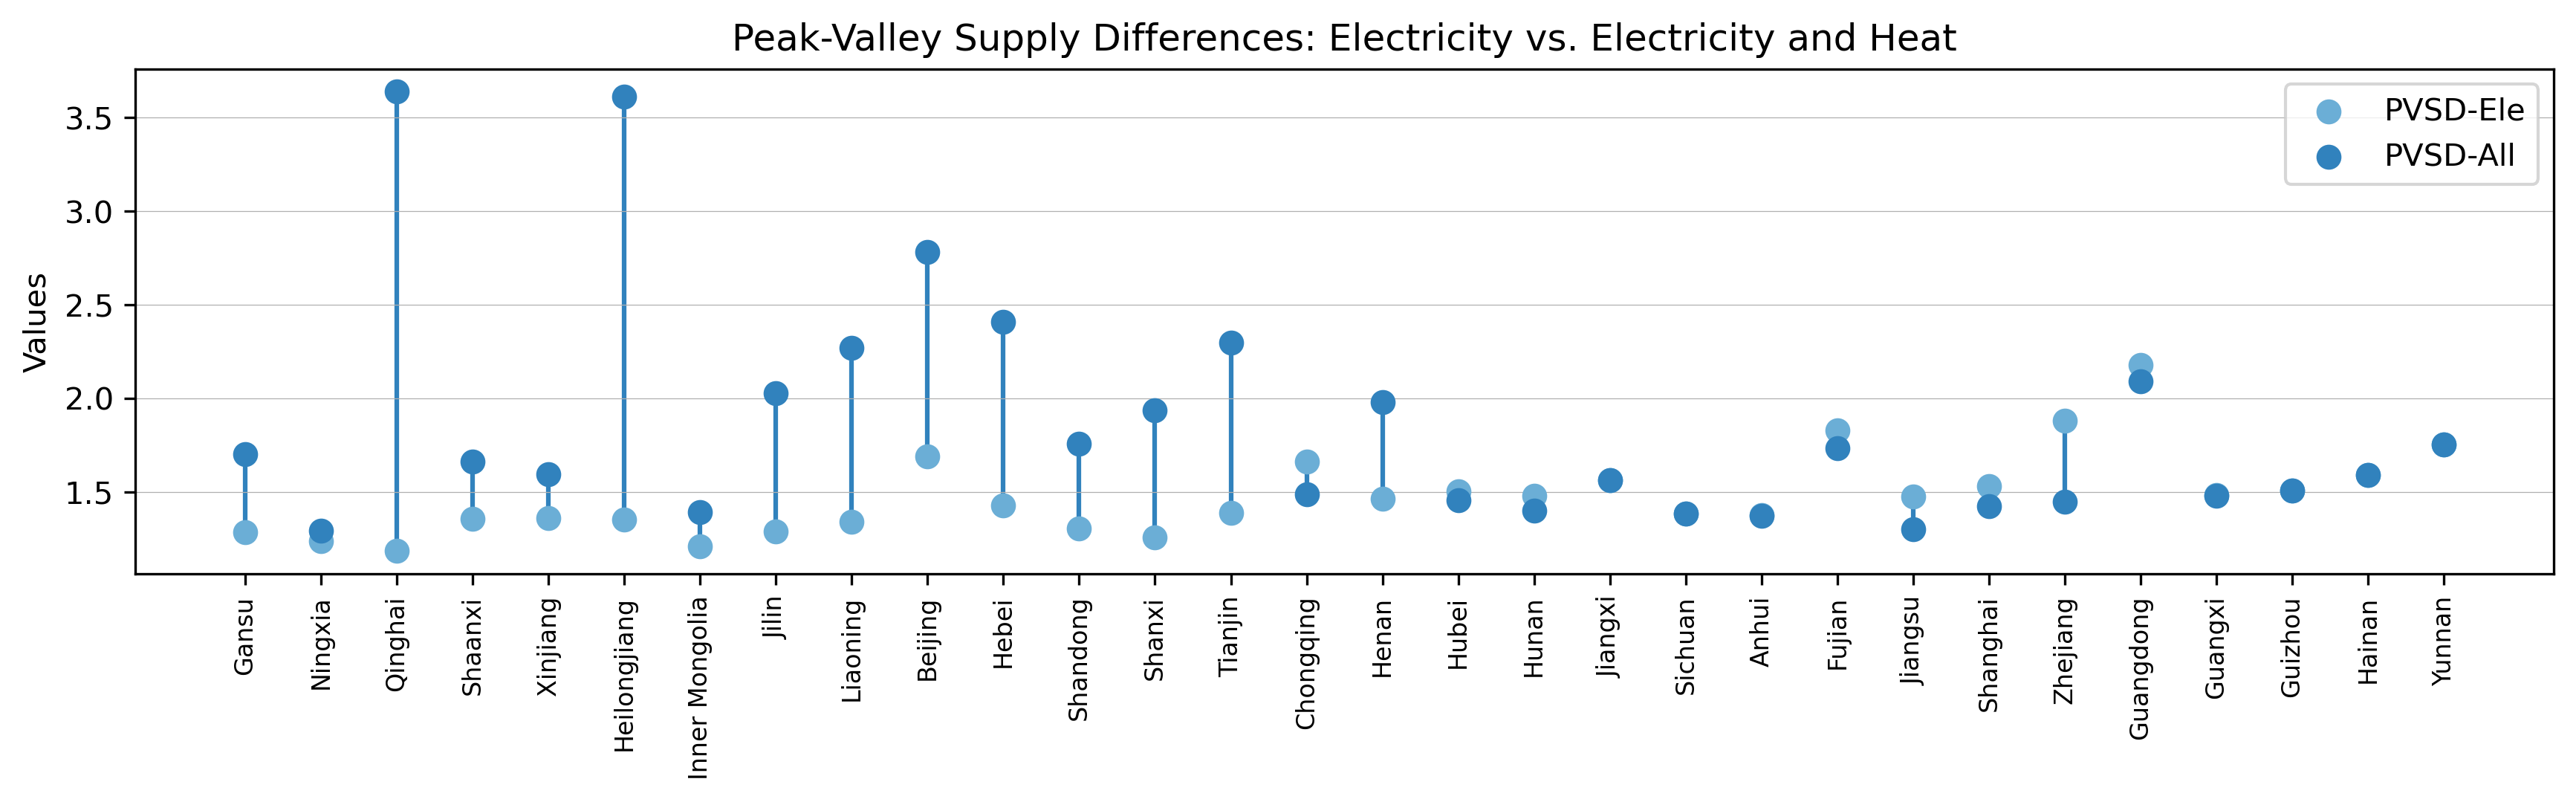

In [5]:
plt.figure(figsize=(14, 3), dpi=300)

# Plot the dumbbell plot
for i, row in df_combined.iterrows():
    plt.plot( [row['Province'], row['Province']],[row['Elc_Ratio'], row['Total_Ratio']], '-', color='#3182bd', markersize=5, zorder=1)
    plt.scatter(row['Province'], row['Elc_Ratio'],  color='#6baed6', s=50, label='PVSD-Ele' if i == 0 else "", zorder=2)
    plt.scatter(row['Province'], row['Total_Ratio'], color='#3182bd', s=50, label='PVSD-All' if i == 0 else "", zorder=2)
    

# plt.gca().invert_yaxis()
# Add labels and title
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Values')
plt.title('Peak-Valley Supply Differences: Electricity vs. Electricity and Heat')
plt.legend() #loc='upper left'
plt.grid(which='major', axis='y', linewidth=0.3)
# plt.tick_params(axis='both', which='both', length=0)
plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/PVSD.png", dpi=300, bbox_inches='tight')
plt.show()

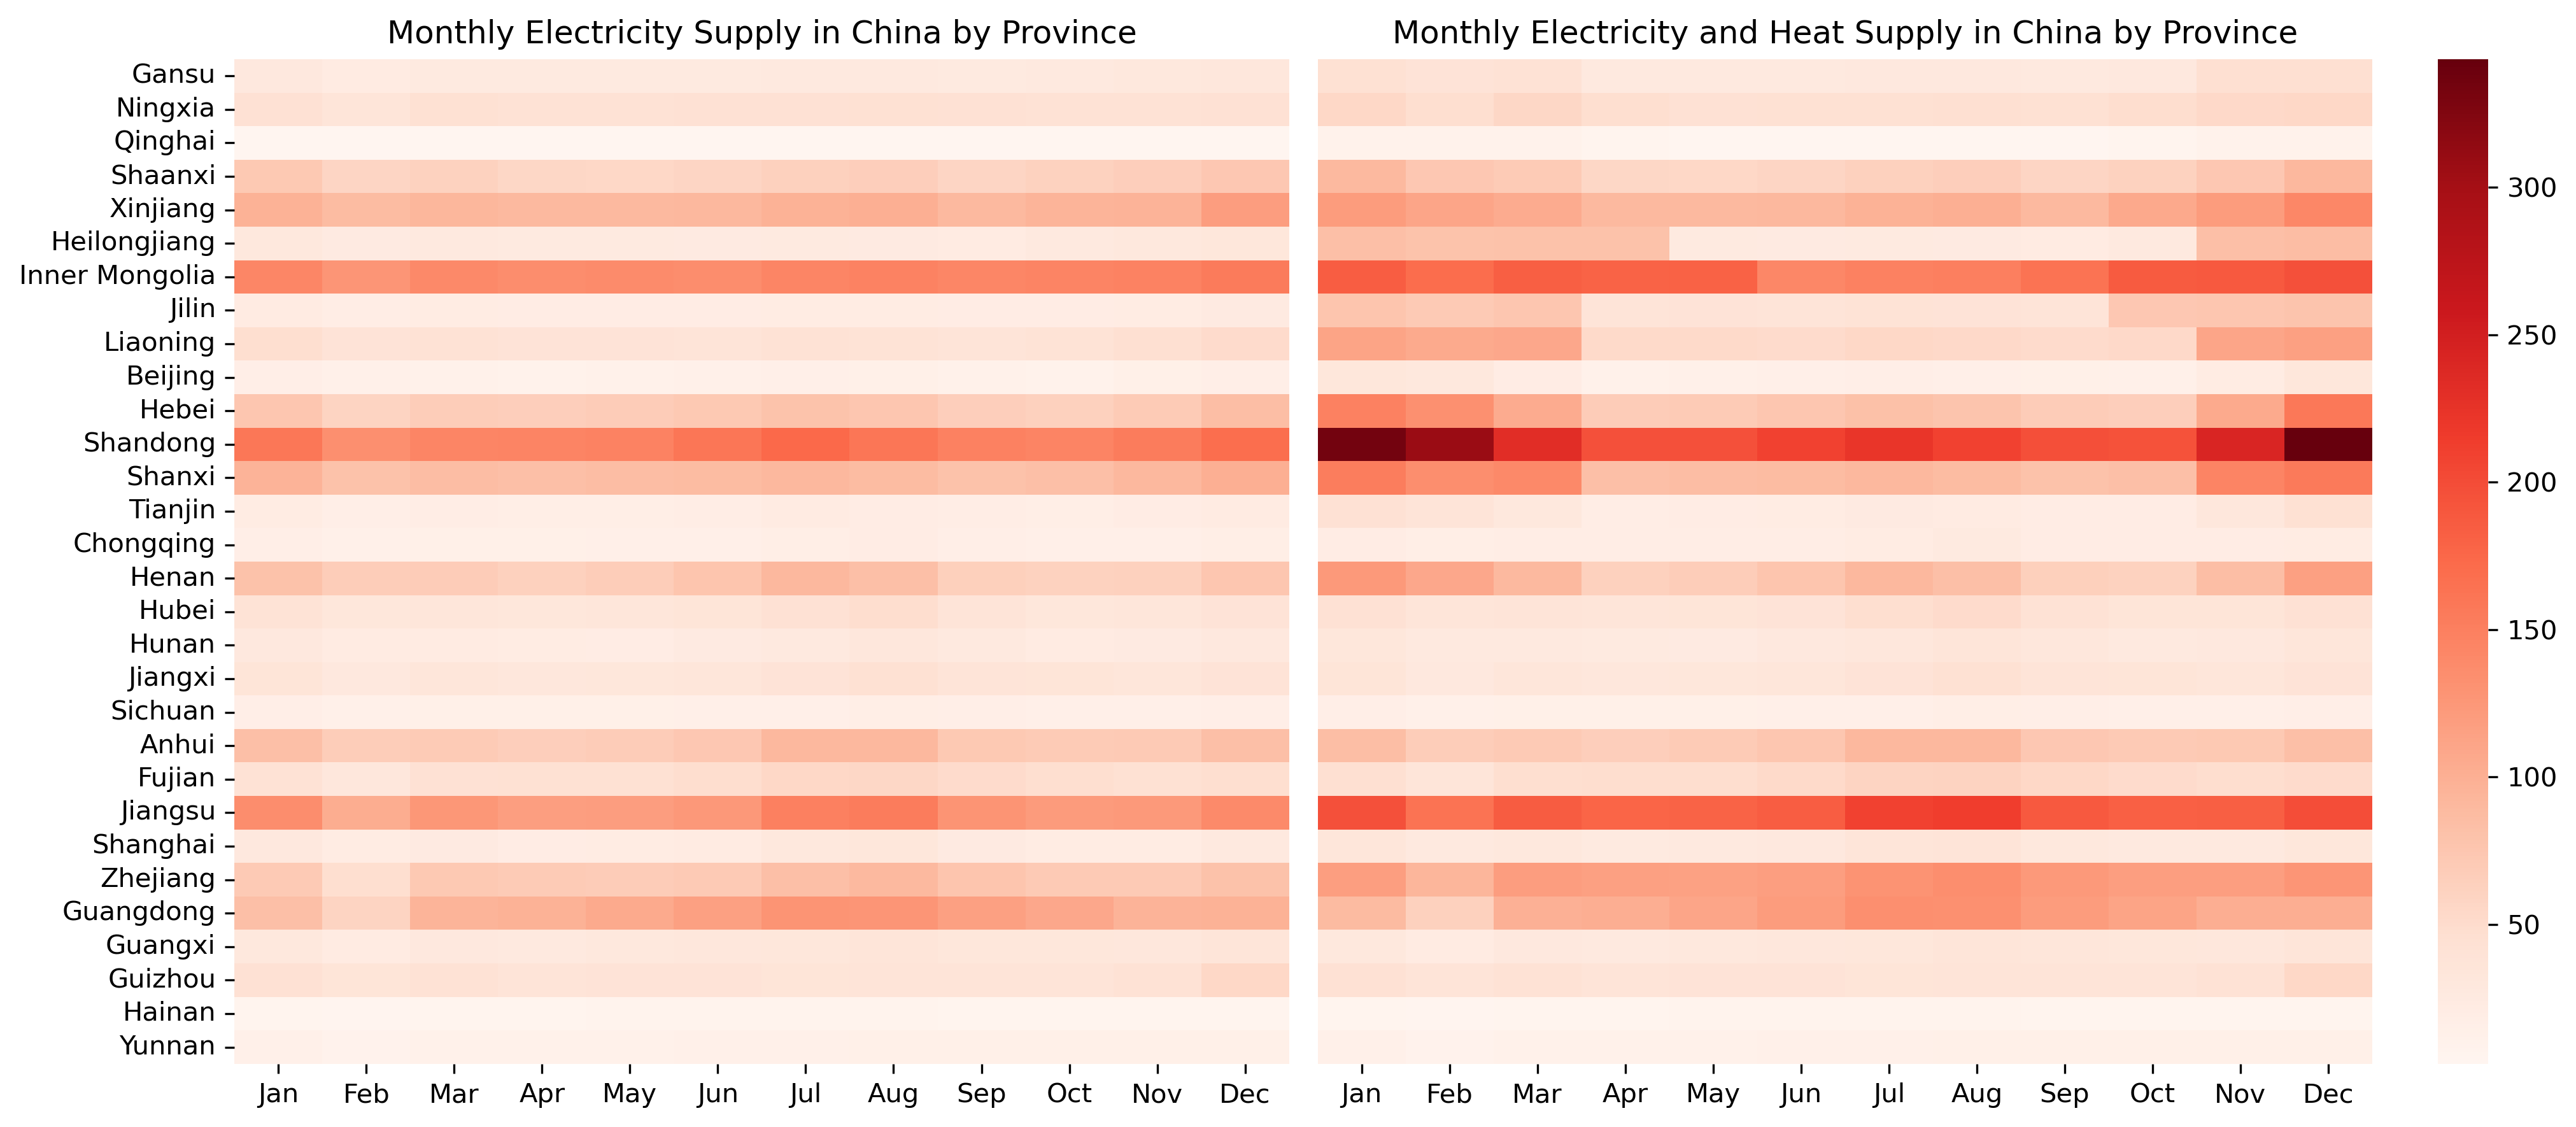

In [6]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300, gridspec_kw={'width_ratios': [1, 1.25]})

vmin = min(df_elc_supply.min().min(), df_total_supply.min().min())
vmax = max(df_elc_supply.max().max(), df_total_supply.max().max())

sns.heatmap(df_elc_supply, annot=False, cmap='Reds', ax=axes[0], vmin=vmin, vmax=vmax, cbar=False)
axes[0].set_title('Monthly Electricity Supply in China by Province')
axes[0].set_ylabel('') 
sns.heatmap(df_total_supply, annot=False, cmap='Reds', ax=axes[1], vmin=vmin, vmax=vmax, yticklabels=False)
axes[1].set_title('Monthly Electricity and Heat Supply in China by Province')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/monthly_supply_by_province.png", dpi=300, bbox_inches='tight')
plt.show()

## 厂级数据季节呈现

In [8]:
## 厂级压力数据处理（供给压力、燃料压力、温室气体排放压力、淡水资源压力）
import os

folder_path = r"E:/Test/Inputs/"

df_intensity = pd.read_excel(os.path.join(folder_path,"province_intensity.xlsx"))
wi_ele = df_intensity.set_index('Province')['water_con_m3/kWh'].to_dict()
wi_heat = df_intensity.set_index('Province')['heat_WC_m3/GJ'].to_dict()
emission_intensity = df_intensity.set_index('Province')['GHG_emis_tCO2eq/kWh'].to_dict()

# CFPPs
df_m_cfpp = pd.read_excel(os.path.join(folder_path,"CFPP.xlsx"))
df_CFPP = pd.read_excel(os.path.join(folder_path,"coal-fired_power_plants_China_2020_operating.xlsx"),usecols=['Plant_Code','WGS84_Lon','WGS84_Lat'])
j_lon = df_CFPP.set_index('Plant_Code')['WGS84_Lon'].to_dict()
j_lat = df_CFPP.set_index('Plant_Code')['WGS84_Lat'].to_dict()

df_m_cfpp['total_supply_106GJ'] = df_m_cfpp['Monthly_Gen_kWh'].div(278000000)+df_m_cfpp['Monthly_Heat_GJ'].div(1000000) # million GJ
df_m_cfpp['total_106tce'] = df_m_cfpp['Monthly_Coal_Ele_tce'].div(1000000) + df_m_cfpp['Monthly_Coal_Heat_tce'].div(1000000) # million tce
df_m_cfpp['emission_106tCO2eq'] = df_m_cfpp.apply(
    lambda row: row['total_supply_106GJ'] * emission_intensity[row['Province']]*278,
    axis=1
) #million tCO2eq
df_m_cfpp['water_consumption_106m3'] = df_m_cfpp.apply(
    lambda row: row['Monthly_Gen_kWh'] * wi_ele[row['Province']]+row['Monthly_Heat_GJ'] * wi_heat[row['Province']],
    axis=1
) 

df_m_cfpp['water_consumption_106m3'] = df_m_cfpp['water_consumption_106m3'].div(1000000)#million m3


# GFPPs
df_m_gfpp = pd.read_excel(os.path.join(folder_path,"GFPP.xlsx"))
df_GFPP = pd.read_excel(os.path.join(folder_path,"gas-fired_power_plants_China_2020_operating.xlsx"),usecols=['Plant_Code','Longitude','Latitude','Capacity_MW'])
g_lon = df_GFPP.set_index('Plant_Code')['Longitude'].to_dict()
g_lat = df_GFPP.set_index('Plant_Code')['Latitude'].to_dict()

df_m_gfpp['total_supply_106GJ'] = df_m_gfpp['Monthly_Gen_kWh'].div(278000000)+df_m_gfpp['Monthly_Heat_GJ'].div(1000000) # million GJ
df_m_gfpp['total_106tce'] = df_m_gfpp['total_supply_106GJ']*0.065 # million tce
df_m_gfpp['emission_106tCO2eq'] = df_m_gfpp.apply(
    lambda row: row['total_supply_106GJ'] * emission_intensity[row['Province']]*278,
    axis=1
)
df_m_gfpp['water_consumption_106m3'] = df_m_gfpp['Monthly_Water_Ele_m3'] + df_m_gfpp['Monthly_Water_Heat_m3'] # million m3
df_m_gfpp['water_consumption_106m3'] = df_m_gfpp['water_consumption_106m3'].div(1000000)

# WIPPs
df_m_wipp = pd.read_excel(os.path.join(folder_path,"WIPP.xlsx"))
df_WIPP = pd.read_excel(os.path.join(folder_path,"waste_inceration_plants_2020_operating.xlsx"),usecols=['Plant_Code','Longitude','Latitude'])
k_lon = df_WIPP.set_index('Plant_Code')['Longitude'].to_dict()
k_lat = df_WIPP.set_index('Plant_Code')['Latitude'].to_dict()

df_m_wipp['total_supply_106GJ'] = df_m_wipp['Monthly_Gen_kWh'].div(278000000)+df_m_wipp['Monthly_Heat_GJ'].div(1000000) # million GJ
df_m_wipp['emission_106tCO2eq'] = df_m_wipp.apply(
    lambda row: row['total_supply_106GJ'] * emission_intensity[row['Province']]*278,
    axis=1
)
df_m_wipp['water_consumption_106m3'] = df_m_wipp['Monthly_Water_Ele_m3'] + df_m_wipp['Monthly_Water_Heat_m3']#million m3
df_m_wipp['water_consumption_106m3'] = df_m_wipp['water_consumption_106m3'].div(1000000)

In [24]:
# 需要处理的月份
months = [12]

# 需要处理的数据列和对应的新DataFrame的后缀
columns_and_suffixes = {
#     'total_supply_106GJ': '_supply',
#     'total_106tce': '_fuel',
#     'emission_106tCO2eq': '_emission',
    'water_consumption_106m3': '_water'
}

# 对于每个技术类型和每个月份进行操作
for month in months:
    for tech, df_tech, lon_map, lat_map in [
        ('CFPP', df_m_cfpp, j_lon, j_lat),
        ('GFPP', df_m_gfpp, g_lon, g_lat),
        ('WIPP', df_m_wipp, k_lon, k_lat)
    ]:
        
        df_tech_filtered = df_tech[df_tech['Statistical month'] == (202000 + month)]
        df_tech_filtered = df_tech_filtered.copy()
        
        # 映射经纬度和容量
        df_tech_filtered['longitude'] = df_tech_filtered['Plantcode'].map(lon_map)
        df_tech_filtered['latitude'] = df_tech_filtered['Plantcode'].map(lat_map)
        
        
        # 针对每一列生成新的DataFrame
        for column, suffix in columns_and_suffixes.items():
            if column in df_tech_filtered.columns:  # 检查该列是否存在
                df_temp = df_tech_filtered[['Province','Plantcode', 'Capacity_MW', column, 'longitude', 'latitude']].copy()
                df_temp['Tech'] = tech
                for index, row in df_temp.iterrows():
                    df_temp.at[index, column] = row[column] * wta_12[row['Province']]
                
                # 使用月份动态生成变量名称
                globals()[f'df_{month}_{tech.lower()}{suffix}'] = df_temp


            
suffixes = ['water'] #'supply', 'fuel', 'emission',

# 用于存储最终合并的DataFrame
map_dfs = {}

for month in months:
    for suffix in suffixes:
        # 收集需要concat的DataFrame
        dfs_to_concat = []
        for tech in ['cfpp', 'gfpp', 'wipp']:
            var_name = f'df_{month}_{tech}_{suffix}'
            if var_name in globals():
                dfs_to_concat.append(globals()[var_name])
        
        # 如果有可用的DataFrame，进行concat操作
        if dfs_to_concat:
            map_df = pd.concat(dfs_to_concat, ignore_index=True)
            map_df.to_excel(fr'E:/Test/data_preprocess/dataset_description/Plants_WTA_{month}_{suffix}.xlsx',index=False)
            # 将结果存储在字典中，以便后续使用
            map_dfs[f'df_{month}_{suffix}'] = map_df

# # 使用 merged_dfs 访问结果，例如：
# df_8_supply = map_dfs['df_8_supply']
# # df_12_emission = map_dfs['df_12_emission']
df_12_water = map_dfs['df_12_water']

In [23]:
df_8_water = map_dfs['df_8_water']

In [26]:
df_water = pd.concat([df_8_water,map_dfs['df_12_water']], axis=0)
df_water.to_excel(r'E:/Test/data_preprocess/dataset_description/df_wta_water.xlsx',index=False)

In [2]:
df_WA = pd.read_excel(r"E:\Test\Inputs\WA_2020_monthly.xlsx")
df_WA.drop(columns=['WTA'], inplace=True)

df_withdrwal = pd.read_excel(r"E:\Test\Inputs\WA_2020.xlsx",usecols=['Province','Monthly_average_ww_without_eco_reple'])
df_withdrwal = df_withdrwal[df_withdrwal['Province']!='Nation']

df_WA = pd.merge(df_WA, df_withdrwal, on='Province', how='left')

columns_to_update = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in columns_to_update:
    df_WA[i] = df_WA['Monthly_average_ww_without_eco_reple'].div(df_WA[i])
df_WA.drop(columns=['Monthly_average_ww_without_eco_reple'], inplace=True)

wta_8 = df_WA.set_index('Province')['Aug'].to_dict()
wta_12 = df_WA.set_index('Province')['Dec'].to_dict()

df_WA

,Province,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Monthly_average_ww_without_eco_reple
0,Anhui,52.952183,44.089635,59.630006,72.976907,93.380432,122.350962,175.933371,177.642036,160.324842,131.155650,106.154381,75.509595,21.666667
1,Beijing,0.486516,0.358269,0.343931,0.326035,0.334033,0.303293,0.622669,1.782698,1.497278,1.102361,0.815266,0.627651,1.950000
2,Fujian,19.036515,28.717492,62.502568,95.451890,108.548609,150.503337,82.890611,71.527103,60.712726,30.066533,21.965549,19.077066,14.475000
3,Gansu,18.273518,12.945215,12.633702,13.117845,19.743911,31.742916,51.246594,62.443209,59.036920,53.359847,37.118846,25.637478,8.266667
4,Guangdong,44.505965,46.761789,69.240026,111.395192,177.525487,280.395191,247.924996,238.550952,180.235570,104.156787,68.703709,50.604335,33.258333
5,Guangxi,63.705947,60.736748,85.077589,124.704044,209.126328,342.865289,365.884473,317.627157,223.720590,141.715758,104.130211,71.405865,21.416667
6,Guizhou,43.012319,40.746326,55.867353,79.971497,120.869786,181.127434,207.261109,194.455305,153.002517,115.567242,82.558266,52.460845,7.366667
7,Hainan,7.865590,5.527094,4.883850,4.756226,8.331799,15.092911,19.940066,33.334075,58.052343,65.229988,27.211296,12.274764,3.575000
8,Hebei,5.417148,4.066025,3.983133,3.696139,3.716436,4.030571,13.941341,30.061280,18.649571,12.795963,9.075073,6.967322,12.741667
9,Henan,15.816135,13.003954,17.274720,21.006636,26.975778,35.055267,50.994120,52.339628,47.520566,39.230027,31.753540,22.629629,16.841667
